In [1]:
import pandas as pd
from pathlib import Path
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import pandas_profiling

In [2]:
home = Path.cwd()
home

PosixPath('/Users/germanportes/Documents/general_assembly/projects/final_project')

In [3]:
stocks = pd.read_csv("../final_project/sp500_1.csv")
#stocks = pd.read_csv("../final_project/sp500_1.csv").profile_report()
stocks.sample(10)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker
131649,2017-03-03,133.479996,132.179993,132.809998,132.410004,616400.0,131.868484,0.009835,-0.003012,CXO
477099,2017-10-16,109.050003,107.160004,108.790001,108.300003,5552200.0,106.886917,0.017637,-0.004504,V
301053,2017-11-02,79.300003,75.360001,79.199997,76.650002,11445200.0,74.158928,0.052282,-0.032197,LOW
226792,2017-06-09,22.100000,21.150000,21.230000,22.070000,5453300.0,20.487944,0.044917,0.039567,HBI
468179,2018-05-24,77.702446,76.290016,76.516006,77.410545,3646500.0,74.830254,0.018514,0.011691,VFC
225013,2018-05-18,308.399994,305.260010,307.059998,307.609985,708700.0,300.472717,0.010286,0.001791,GWW
89671,2018-08-03,44.959999,44.380001,44.810001,44.770000,777000.0,44.770000,0.013069,-0.000893,CDNS
302505,2019-08-12,75.370003,72.879997,74.910004,72.930000,2153600.0,71.940384,0.034166,-0.026432,LYB
198078,2015-11-12,20.309999,20.020000,20.230000,20.059999,7164300.0,17.985279,0.014485,-0.008403,FITB
225715,2017-03-02,54.500000,53.680000,54.369999,53.869999,5772100.0,50.722393,0.015276,-0.009196,HAL


In [4]:
stocks['SMA_5'] = stocks.iloc[:,1].rolling(window=5).mean()
#stocks['SMA_20'] = stocks.iloc[:,1].rolling(window=20).mean()
#stocks['SMA_30'] = stocks.iloc[:,1].rolling(window=30).mean()
#stocks['EMA100'] = stocks.iloc[:,1].ewm(span=40,adjust=False).mean()

In [5]:
stocks.sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
159734,2016-04-05,81.790001,80.169998,81.730003,80.400002,2359300.0,80.400002,0.020207,-0.016273,DLTR,83.266000
424500,2016-08-08,121.000000,119.919998,120.790001,120.160004,677100.0,115.974373,0.009006,-0.005216,SPGI,120.966002
285610,2019-06-14,30.530001,29.980000,30.490000,30.309999,11839700.0,29.838432,0.018346,-0.005904,KHC,30.486000
216002,2018-08-15,193.470001,190.770004,192.830002,192.309998,1121000.0,188.154663,0.014153,-0.002697,GD,193.698001
258174,2018-03-29,85.680000,83.309998,85.059998,83.330002,1592500.0,83.330002,0.028448,-0.020339,INCY,86.810001
294905,2017-06-13,81.290001,80.239998,81.209999,81.250000,4492900.0,76.974022,0.013086,0.000493,LLY,80.754001
323278,2018-04-06,89.709999,85.879997,88.389999,86.269997,2461700.0,84.075699,0.044597,-0.023985,MCHP,90.348000
199192,2016-04-18,35.889999,35.480000,35.570000,35.849998,2505600.0,30.896717,0.011556,0.007872,FE,35.852000
11709,2018-03-21,194.899994,188.440002,189.570007,192.259995,375100.0,189.049072,0.034281,0.014190,AMG,193.643997
450325,2019-06-04,104.180000,102.260002,102.260002,104.139999,1118800.0,103.780716,0.018776,0.018384,TSCO,101.656000


In [6]:
# any missing data
stocks.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_5             4
dtype: int64

In [7]:
#size
stocks.shape

(505207, 11)

In [8]:
# Establish our target variables: "runs"
stocks['Close'].describe()

count    505207.000000
mean        106.499921
std         171.910724
min           1.740000
25%          44.410000
50%          72.330002
75%         116.739998
max        3766.270020
Name: Close, dtype: float64

In [9]:
# to find out our predictors... use "correlations"
corrs = stocks.corr()
corrs['Close'].sort_values()

Volume           -0.119629
HL_pct_diff      -0.026788
daily_pct_chng    0.003822
SMA_5             0.998444
Adj Close         0.999761
Open              0.999864
High              0.999932
Low               0.999938
Close             1.000000
Name: Close, dtype: float64

In [10]:
# How many unique companies are there?
stocks['ticker'].nunique()

505

In [11]:
stocks.sort_values(by = 'ticker', ascending=True).head(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
13105,2015-10-02,34.680000,33.119999,33.180000,34.669998,3519400.0,33.370094,0.047101,0.044907,A,45.184000
13448,2017-02-13,50.889999,50.419998,50.630001,50.520000,1568300.0,49.292866,0.009322,-0.002173,A,50.417999
13447,2017-02-10,50.590000,50.020000,50.509998,50.360001,2092500.0,49.136753,0.011395,-0.002970,A,50.116000
13446,2017-02-09,50.799999,49.930000,49.930000,50.470001,2557700.0,49.244080,0.017424,0.010815,A,49.892000
13445,2017-02-08,50.029999,49.230000,49.369999,49.930000,2107100.0,48.717190,0.016250,0.011343,A,49.532000


In [12]:
# create new column to define change in stock prices from opening and closing price
stocks["OC_change"] = stocks.groupby("ticker")["Close"].pct_change(1)

In [13]:
stocks.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5,OC_change
329612,2019-05-28,52.209999,50.889999,52.150002,50.970001,13265400.0,50.467064,0.025938,-0.022627,MDLZ,52.346000,-0.022252
483237,2016-05-06,60.709999,60.130001,60.290001,60.689999,2979700.0,56.221928,0.009646,0.006635,WM,60.416000,0.006468
181917,2019-09-30,86.720001,86.129997,86.129997,86.260002,1469200.0,86.260002,0.006850,0.001509,EQR,86.622000,0.000116
246737,2016-09-28,9.920000,9.740000,9.910000,9.920000,11634000.0,8.937484,0.018481,0.001009,HBAN,9.874000,0.018481
163450,2018-06-18,97.779999,96.879997,97.110001,97.400002,961800.0,93.764824,0.009290,0.002986,DTE,97.225999,0.003503


In [14]:
# count of tickers/companies?
top_stocks=stocks['ticker'].value_counts().sort_values(ascending=False).head(10)
top_stocks

ABT     1260
ADBE    1260
ACN     1260
ABMD    1260
ABC     1260
CCI     1008
OMC     1008
XOM     1008
FANG    1008
KHC     1008
Name: ticker, dtype: int64

In [15]:
# Which stocks have the highest volume or traded daily?
stocks.sort_values(by = 'Volume', ascending=False).sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5,OC_change
279269,2018-04-16,54.389999,53.610001,54.279999,53.799999,849400.0,53.799999,0.014550,-0.008843,KEYS,53.918000,-0.001670
204728,2018-04-06,44.450001,42.700001,44.279999,43.180000,1686900.0,42.109356,0.040984,-0.024842,FLS,44.058000,-0.036376
323998,2017-02-13,24.200001,23.820000,24.070000,23.900000,16876400.0,23.900000,0.015953,-0.007063,MU,24.584000,-0.006237
57614,2019-05-21,84.150002,83.620003,83.620003,83.849998,689500.0,83.040588,0.006338,0.002750,AJG,83.842000,0.006723
210783,2017-11-28,42.230000,41.049999,41.240002,42.169998,2865200.0,36.543224,0.028745,0.022551,BEN,41.832000,0.024041
167020,2016-08-16,40.916954,40.216263,40.743946,40.458477,2267200.0,38.998409,0.017423,-0.007006,DXC,40.987889,-0.012249
144254,2018-10-29,71.519997,69.480003,71.160004,70.540001,6262100.0,68.725266,0.029361,-0.008713,CVS,71.786000,0.005990
404608,2017-06-12,73.669998,72.849998,73.480003,73.040001,465200.0,70.645523,0.011256,-0.005988,RMD,73.492000,-0.005988
418084,2019-02-25,442.750000,436.519989,441.000000,437.679993,538100.0,435.574890,0.014272,-0.007528,SHW,441.899994,-0.005001
223635,2016-11-28,211.759995,209.600006,210.000000,210.350006,3297400.0,201.279648,0.010305,0.001667,GS,212.312000,-0.004873


In [16]:
stocks.groupby(['ticker', 'High'])['High'].count()
stocks.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5,OC_change
209919,2019-08-14,50.919998,49.470001,50.919998,49.849998,1499400.0,49.629425,0.029311,-0.021013,FBHS,52.289999,-0.034663
209070,2016-03-31,56.360001,55.389999,55.900002,56.040001,800800.0,53.115528,0.017512,0.002504,FBHS,55.630000,0.004301
201102,2015-11-12,48.169998,47.700001,47.990002,47.720001,1711600.0,47.720001,0.009853,-0.005626,FISV,48.196999,-0.010677
126995,2018-09-13,77.230003,75.820000,75.949997,77.199997,3990000.0,76.265633,0.018597,0.016458,CTSH,76.662001,0.019815
257888,2017-02-08,123.589996,117.180000,117.320000,122.730003,2180700.0,122.730003,0.054702,0.046113,INCY,122.297998,0.038501


In [17]:
stocks_volume=stocks.groupby('ticker')['Volume'].sum().sort_values(ascending=False)
stocks_volume.head()

ticker
BAC     7.998436e+10
GE      6.550756e+10
AMD     5.947630e+10
F       3.855452e+10
AAPL    3.329668e+10
Name: Volume, dtype: float64

In [18]:
stocks_volume = stocks.sort_values(by =['ticker', 'Volume'], ascending=True)
stocks_volume.sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5,OC_change
43608,2015-10-19,60.389999,59.529999,59.939999,60.220001,2107900.0,54.940929,0.014447,0.004671,ADI,60.898000,0.000498
56162,2017-08-14,170.690002,167.542007,168.080002,169.800003,639700.0,169.800003,0.018789,0.010233,ANET,170.262000,0.024805
498186,2015-10-12,27.957840,27.378130,27.826086,27.562582,3289800.0,24.049885,0.021174,-0.009470,XRX,27.541502,-0.008531
186338,2017-04-13,234.699997,230.520004,234.110001,230.630005,245700.0,217.889862,0.018133,-0.014865,RE,234.839996,-0.011656
233388,2019-08-14,40.200001,39.070000,39.500000,39.410000,1843200.0,39.410000,0.028922,-0.002278,HP,42.484000,-0.026673
102395,2017-01-31,116.320000,111.900002,112.029999,116.150002,5976800.0,116.150002,0.039500,0.036776,CELG,114.685999,0.026241
114786,2018-04-04,169.610001,165.500000,165.550003,168.789993,2533900.0,168.748779,0.024834,0.019571,CI,169.328000,0.005600
263512,2019-08-26,491.230011,482.600006,489.859985,491.089996,480700.0,491.089996,0.017882,0.002511,ISRG,500.368005,0.013434
369180,2016-08-18,38.375000,37.930000,38.070000,38.220001,3880600.0,38.220001,0.011732,0.003940,PYPL,38.529000,0.002098
171391,2017-12-19,38.230000,37.720001,38.150002,37.799999,7871000.0,37.383556,0.013521,-0.009174,EBAY,38.143999,-0.009953


In [19]:
# top 5 stocks based on daily traded volume
#top_5= stocks.loc[stocks['ticker'].isin(['BAC', 'GE', 'AMD', 'F', 'AAPL'])]
#top_5.sample(20)
apple = stocks.loc[stocks['ticker'].isin(['BAC'])]
apple.sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5,OC_change
68395,2018-03-01,32.349998,31.360001,32.070000,31.480000,90547100.0,30.503113,0.031569,-0.018397,BAC,32.493999,-0.019315
68688,2019-05-01,30.889999,30.180000,30.559999,30.260000,56161000.0,29.900297,0.023525,-0.009817,BAC,30.730000,-0.010464
68213,2017-06-09,23.670000,23.209999,23.219999,23.670000,108254300.0,22.636988,0.019819,0.019380,BAC,22.922000,0.030475
68314,2017-11-01,27.730000,27.360001,27.639999,27.530001,46527700.0,26.463198,0.013523,-0.003980,BAC,27.830000,0.005111
68624,2019-01-29,29.700001,29.340000,29.540001,29.389999,51451900.0,28.893124,0.012270,-0.005078,BAC,29.514000,-0.008100
68402,2018-03-12,33.049999,32.639999,32.689999,32.840000,60322800.0,31.820911,0.012561,0.004589,BAC,32.520000,0.003667
68717,2019-06-12,28.270000,27.860001,28.200001,27.950001,33528900.0,27.766989,0.014716,-0.008865,BAC,28.254000,-0.010269
68585,2018-11-29,28.350000,27.969999,28.180000,28.040001,46824600.0,27.412748,0.013586,-0.004968,BAC,27.924000,-0.013718
68498,2018-07-27,31.139999,30.799999,30.990000,31.059999,57198900.0,30.219114,0.011039,0.002259,BAC,31.084000,0.003878
68358,2018-01-05,30.420000,30.049999,30.370001,30.330000,56445200.0,29.278934,0.012313,-0.001317,BAC,30.116000,0.004637


In [20]:
stocks.groupby(by='ticker', axis=0).Volume.mean().sort_values(ascending=False)

ticker
BAC     7.934957e+07
GE      6.498766e+07
AMD     5.900427e+07
F       3.824853e+07
AAPL    3.303242e+07
            ...     
RE      3.312584e+05
TFX     3.055278e+05
MKTX    2.698898e+05
MTD     1.803701e+05
NVR     2.862312e+04
Name: Volume, Length: 505, dtype: float64

In [21]:
# any missing data
#top_5.isnull().sum()
apple.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_5             0
OC_change         1
dtype: int64

In [22]:
#top_5=top_5.drop(['OC_change'], axis=1)
#apple=apple.drop(['OC_change'],axis=0)

In [24]:
# size
#top_5.shape
apple.shape

(1008, 12)

In [38]:
#top_5.to_csv('top5.csv')
apple.to_csv('BAC.csv')

In [39]:
# establish target variable: High
#top_5['Close'].describe()
apple['Close'].describe()

count    1008.000000
mean       23.876657
std         6.157061
min        11.160000
25%        17.252501
50%        25.040000
75%        29.200001
max        32.840000
Name: Close, dtype: float64

In [40]:
#corrs = top_5.corr()
corrs = apple.corr()
corrs['Close'].sort_values()

Volume           -0.440021
HL_pct_diff      -0.217120
OC_change         0.010763
daily_pct_chng    0.016501
SMA_5             0.947934
Open              0.998698
Adj Close         0.998916
High              0.999390
Low               0.999459
Close             1.000000
Name: Close, dtype: float64

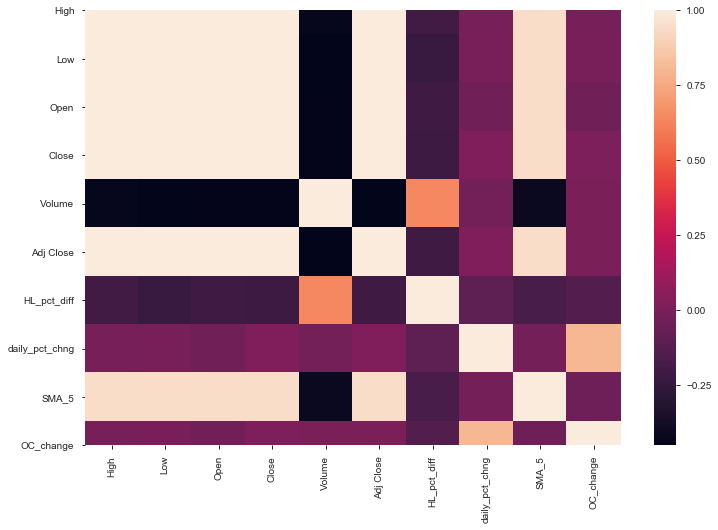

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(corrs);

# Preprocessing

In [42]:
top_5.columns

NameError: name 'top_5' is not defined

In [43]:
#stock_high = top_5[['Low', 'Open', 'Close', 'Volume', 'Adj Close','daily_pct_chng', 'ticker']]
#stock_high = top_5[['Low', 'High','Close', 'Volume', 'Adj Close','daily_pct_chng']]
#stock_high = top_5[['Open','High','Low','SMA_5','ticker']]
apple_stock = apple[['Low', 'High','Open','SMA_5', 'Volume', 'daily_pct_chng',]]

In [44]:
#stock_high.sample(5)
apple_stock.sample(5)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
68116,22.520000,22.930000,22.660000,22.918,102564900.0,-0.000883
68206,22.090000,22.799999,22.780001,23.296,138636300.0,-0.016242
67819,17.090000,17.309999,17.129999,17.790,103574900.0,0.004086
68215,23.660000,24.110001,23.950001,23.530,68047300.0,-0.007516
68717,27.860001,28.270000,28.200001,28.254,33528900.0,-0.008865


In [ ]:
def ticker_name(row):
    if 'BAC' in row:
        return 1
    if 'GE' in row:
        return 2
    if 'AMD' in row:
        return 3
    if 'F' in row: 
        return 4
    else:
        return 5

In [ ]:
#stock_high['ticker']=stock_high['ticker'].apply(ticker_name)

In [32]:
#stock_high.describe()
apple_stock.describe()

,Low,High,Open,SMA_5,Volume,daily_pct_chng
count,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03,1008.000000
mean,23.639911,24.109811,23.877302,24.196573,7.934957e+07,0.000084
std,6.118034,6.200095,6.160096,6.356604,3.914043e+07,0.013311
min,10.990000,11.550000,11.460000,12.188000,1.427360e+07,-0.060408
25%,17.025001,17.377500,17.187500,17.447500,5.475072e+07,-0.007376
50%,24.875000,25.310000,25.140000,25.338000,6.909990e+07,0.000000
75%,28.932500,29.492500,29.219999,29.476000,9.279130e+07,0.007316
max,32.639999,33.049999,32.970001,61.718001,3.750887e+08,0.060864


In [34]:
#stock_high.sample(10)
apple_stock.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
68342,28.910000,29.500000,29.320000,29.140,76017200.0,0.000000
68188,23.730000,24.049999,23.980000,23.798,68133400.0,-0.005421
68138,24.540001,24.950001,24.610001,24.744,81531900.0,0.007314
67947,14.430000,14.870000,14.600000,14.428,106156900.0,-0.004795
68140,24.020000,24.350000,24.120001,24.714,97074400.0,0.004560
68435,29.969999,30.209999,29.990000,30.418,47411200.0,0.005335
68687,30.410000,30.879999,30.799999,30.586,47764200.0,-0.007143
67907,13.600000,13.830000,13.770000,13.812,95789700.0,-0.010893
67935,14.150000,14.510000,14.510000,14.904,110549000.0,-0.010338
68559,26.110001,27.200001,26.389999,28.432,102392500.0,0.023873


In [35]:
# standardize variables
from sklearn.preprocessing import StandardScaler
std_scaler =StandardScaler()

In [36]:
#std_scaler.fit(stock_high)
std_scaler.fit(apple_stock)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
#scaled_stock =std_scaler.transform(stock_high)
scaled_stock =std_scaler.transform(apple_stock)

In [45]:
import pickle
filename = open('BAC_fitted_scaler.pkl', 'wb')
pickle.dump(scaled_stock, filename)
#pickle.dump(stock_high, filename)
filename.close()

In [46]:
#scaled_df=pd.DataFrame(scaled_stock, columns = stock_high.columns)
scaled_df=pd.DataFrame(scaled_stock, columns = apple_stock.columns)
scaled_df.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng
0,-1.354033,-1.366756,-1.357357,5.905677,-0.200219,0.138958
1,-1.473412,-1.408711,-1.428820,4.032679,2.619790,1.488984
2,-1.340951,-1.342551,-1.368726,2.227991,-0.103123,1.161270
3,-1.319691,-1.337710,-1.331370,0.422987,-0.303567,0.041601
4,-1.319691,-1.319959,-1.315129,-1.335428,-0.324480,-0.149230


In [47]:
#stock_high.mean()
scaled_df.mean() 


Low              -4.549932e-16
High              1.600351e-16
Open             -6.075387e-16
SMA_5            -6.197644e-16
Volume           -1.500123e-16
daily_pct_chng   -2.731501e-17
dtype: float64

In [48]:
#stock_high.std()
scaled_df.std()

Low               1.000496
High              1.000496
Open              1.000496
SMA_5             1.000496
Volume            1.000496
daily_pct_chng    1.000496
dtype: float64

# Model Building

In [50]:
# target variable
#y = top_5['Close']
y = apple['Close']
y.shape
y.head

<bound method NDFrame.head of 67788    15.550000
67789    15.380000
67790    15.690000
67791    15.690000
67792    15.750000
           ...    
68791    29.129999
68792    29.350000
68793    29.170000
68794    28.440001
68795    27.840000
Name: Close, Length: 1008, dtype: float64>

In [51]:
#X= top_5.drop('Close', axis=1)
X= apple.drop('Close', axis=1)
#X=stock_high.copy()
X = scaled_df.copy()
X.shape
X.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
506,0.336891,0.296948,0.322021,0.241353,-0.663244,-0.442326
266,-1.182324,-1.207002,-1.206310,-1.231547,0.223196,0.496281
12,-1.252643,-1.274776,-1.279397,-1.280969,-0.419112,0.651354
822,0.237137,0.271129,0.299283,0.202005,-0.307000,-0.620037
824,0.291102,0.269515,0.273297,0.247649,-0.360772,0.493588
311,-0.197859,-0.235567,-0.222071,-0.230831,-1.052165,0.294192
464,0.165182,0.156557,0.130371,0.065386,0.660950,0.876878
614,1.471806,1.442659,1.431320,1.310064,-0.486357,0.338568
786,0.662321,0.650343,0.628987,0.703779,-0.560470,0.020754
691,0.742451,0.816552,0.846624,0.738406,0.586847,-2.331806


In [52]:
# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.15, random_state=12)

In [53]:
# instantiate
mystocks= LinearRegression()
#linreg=LinearRegression()
mystocks.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# fit model  to training dataset
mystocks.fit(X_train, y_train)  # normalize = False, data is expected to be already centered
y_pred = mystocks.predict(X_test)

In [55]:
# predict the y_values on testing dataset
y_pred = mystocks.predict(X_test)

In [56]:
#looking at prediction and comparing to true values
[round(x,2)for x in y_pred[:5]]

[13.17, 15.7, 12.86, 27.98, 25.29]

In [57]:
list(y_test[:5])

[13.270000457763672,
 15.6899995803833,
 12.699999809265135,
 28.03000068664551,
 25.29999923706055]

# Evaluate Model

In [58]:
# root mean Sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print ('on average my model errs by', rmse)

on average my model errs by 0.07674106189088854


In [59]:
avg_val= y_train.mean()
avg_val

23.806331772670568

In [60]:
comparison_array=np.full((len(y_test), ), avg_val)
coin_flip = sqrt(metrics.mean_squared_error(y_test, comparison_array))
print ('Close', round(rmse-coin_flip))

Close -6


In [61]:
r2=metrics.r2_score(y_test, y_pred)
r2

0.9998285958688835

In [62]:
comparison = np.full(len(y_test), avg_val)
comparison

array([23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80

In [63]:
sqrt(metrics.mean_squared_error(y_test, comparison))

5.880136650784015

In [64]:
y_pred

array([13.17336271, 15.69613911, 12.86158624, 27.97752979, 25.28706495,
       13.83559261, 28.55492344, 14.32090549, 24.53601808, 13.61677505,
       25.59740176, 22.66991648, 29.80799694, 22.1230698 , 25.28514117,
       24.66210137, 23.01669849, 29.72047156, 24.76042873, 26.33563346,
       18.00575195, 29.87674022, 12.67129248, 28.64187575, 16.66829336,
       16.71033471, 23.50732226, 28.71299441, 28.0423036 , 22.2418047 ,
       13.5961298 , 27.76400156, 15.87007045, 23.88966718, 28.49953608,
       13.45894923, 22.89717971, 28.07211011, 24.01337951, 27.96833347,
       30.87404085, 24.69665596, 31.67200817, 29.36579677, 32.34205302,
       27.54568294, 30.86193793, 13.12102114, 29.9212163 , 22.81609509,
       28.36846985, 14.6754774 , 14.43625124, 26.96267373, 29.10401421,
       29.52709301, 28.99272464, 14.69723822, 25.7472264 , 30.0421066 ,
       26.81000164, 13.11182344, 23.89580056, 29.09050449, 29.06145899,
       29.95713275, 26.21261714, 24.53357166, 25.2248767 , 26.22

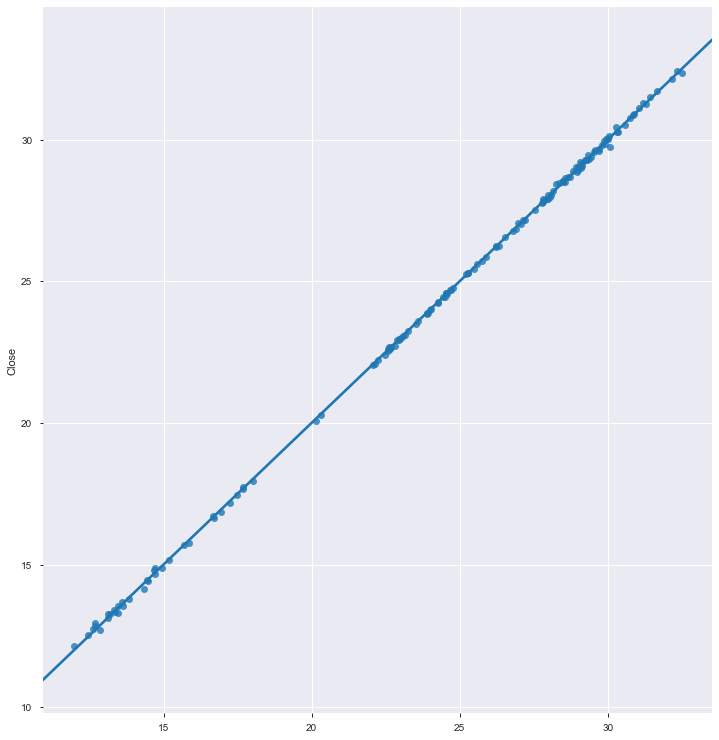

In [65]:
plt.figure(figsize = (12,13))
sns.regplot(x=y_pred, y=y_test);

In [66]:
# pickle final model
filename = open('BACstock_model.pkl', 'wb')
pickle.dump(stocks, filename)
filename.close()

In [67]:
X_test.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
649,0.977938,0.944033,0.981429,0.951833,-0.676820,0.069035
98,-1.887148,-1.876678,-1.852725,-1.834999,0.642855,-1.874899
397,-0.047410,-0.054835,-0.058031,-0.032199,-0.178080,0.281287
374,-0.104646,-0.070971,-0.140863,-0.133561,0.419522,1.528968
301,-0.140623,-0.151655,-0.150608,-0.250978,1.309803,0.452185
893,1.004103,0.966624,0.983053,0.931372,-1.139699,0.295026
916,0.631249,0.660025,0.690705,0.684892,-0.500413,-0.994985
509,0.346703,0.348585,0.386988,0.305256,-0.618007,-1.179883
514,0.364692,0.358267,0.323646,0.288257,-0.189728,1.068688
992,0.860195,0.864962,0.892101,0.730536,-0.648433,0.223993


In [68]:
y_test.head(10)

67976    13.270000
67791    15.690000
67889    12.700000
68483    28.030001
68151    25.299999
67904    13.790000
68572    28.520000
67924    14.170000
68250    24.590000
67983    13.540000
Name: Close, dtype: float64

In [69]:
stock_filter = top_5.loc[top_5['ticker']=='AAPL']
#stock_filter = top_5.loc[top_5['ticker']]
print(len(stock_filter))
print (stock_filter.head())

NameError: name 'top_5' is not defined

In [ ]:
stock_filter['Close'].mean()

In [71]:
print ('actual high', y_test[67976])
print ('predicted', round(y_pred[0]))
## talk to austin about this

actual high 13.270000457763672
predicted 13.0


In [72]:
# predict the y-values
y_pred = mystocks.predict(X_test)
for i in y_pred[:5]:
    print(round(i,0))

13.0
16.0
13.0
28.0
25.0


In [73]:
# How similar are those to the actual high prices?
for i in y_test[:5]:
    print(round(i,0))

13.0
16.0
13.0
28.0
25.0


In [74]:
# the residuals are the difference between true y values and predicted y values.
residuals= y_test - y_pred
for i in residuals[:5]:
    print(round(i,0))

0.0
-0.0
-0.0
0.0
0.0


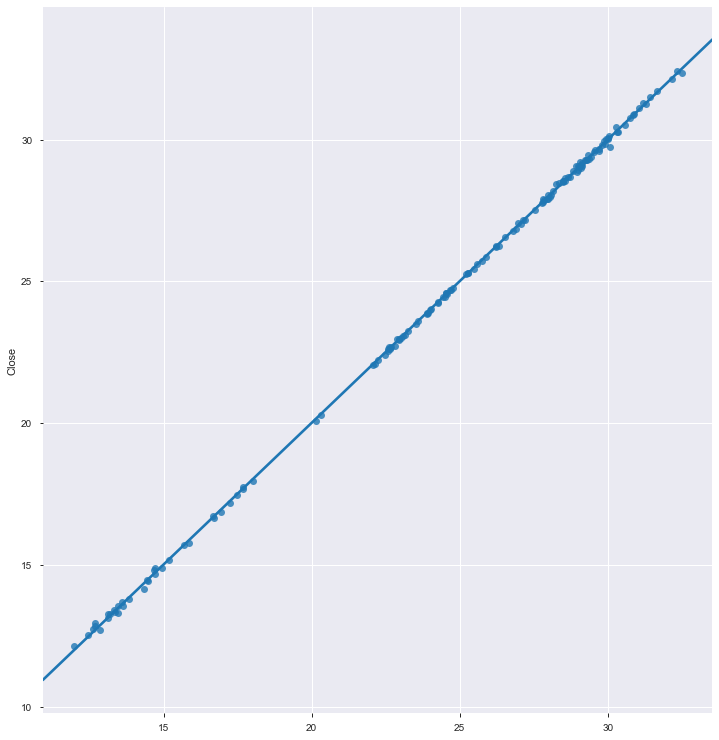

In [75]:
# Use a scatter plot to compare our predictions to the actual values
# Remember: when x==y, that indicates an accurate model! 
# Do we have that?
plt.figure(figsize=(12, 13))
sns.regplot(y_pred, y_test);